In [101]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [67]:
df = pd.read_csv('data/movie_title_ratings.csv')
df = df[df.runtimeMinutes!="\\N"]
df= df[df.startYear!="\\N"]
X = df[["runtimeMinutes","numVotes"]]
y = df.averageRating
df.head(20)

/Users/amjad/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,5.4,58
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,20,"Documentary,News,Sport",5.2,236
3,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Biography,Crime,Drama",6.4,413
4,tt0000584,movie,El ciego de la aldea,El ciego de la aldea,0,1907,\N,75,Drama,4.8,35
9,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908,\N,120,"Adventure,Fantasy",6.1,24
20,tt0001258,movie,The White Slave Trade,Den hvide slavehandel,0,1910,\N,45,Drama,5.6,50
28,tt0001790,movie,"Les Misérables, Part 1: Jean Valjean",Les misérables - Époque 1: Jean Valjean,0,1913,\N,60,Drama,6.3,16
29,tt0001892,movie,Den sorte drøm,Den sorte drøm,0,1911,\N,53,Drama,6.3,132
31,tt0001964,movie,The Traitress,Die Verräterin,0,1911,\N,48,Drama,6.3,35
34,tt0002101,movie,Cleopatra,Cleopatra,0,1912,\N,100,"Drama,History",5.1,359


In [94]:
df['runtimeMinutes']=df['runtimeMinutes'].astype(str).astype(int)
df['startYear']=df['startYear'].astype(str).astype(int)
df.dtypes

tconst             object
titleType          object
primaryTitle       object
originalTitle      object
isAdult             int64
startYear           int64
endYear            object
runtimeMinutes      int64
genres             object
averageRating     float64
numVotes            int64
dtype: object

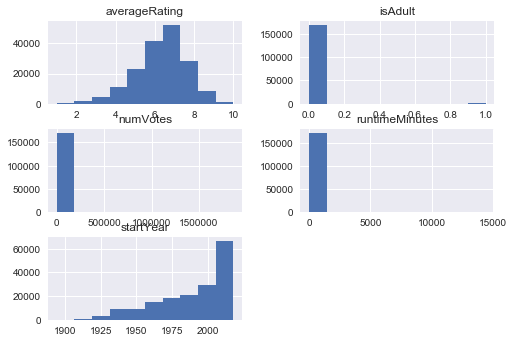

In [98]:
df.hist()
plt.show()

In [68]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(137428, 2) (137428,)
(34358, 2) (34358,)


In [69]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [70]:
predictions[0:5]

array([ 6.27056688,  6.2726896 ,  6.28974019,  6.26195453,  6.25399046])

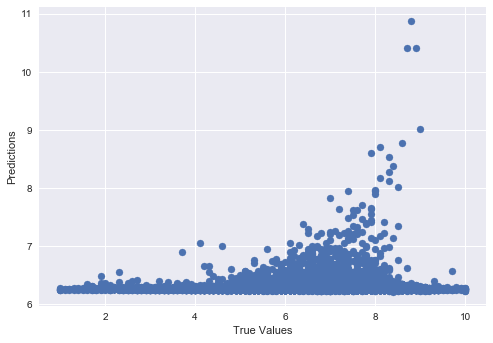

In [71]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

In [72]:
print("Score:{}".format(model.score(X_test, y_test)))

Score:0.005171919120738999


In [167]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
# model= linear_model.LinearRegression()
# model = linear_model.Ridge()
# model = linear_model.ElasticNet()
model = linear_model.Lasso()
# X= df[["runtimeMinutes","numVotes"]]
X=df[["runtimeMinutes"]]
# X=df[["numVotes"]]
scores = cross_val_score(model, X, y, cv=10,scoring='neg_mean_squared_error')
print("Cross-validated scores:{}".format(scores))

Cross-validated scores:[-0.82479134 -1.27425461 -1.52054325 -1.57316071 -1.69282696 -1.78994953
 -1.90907756 -2.04717613 -2.19847525 -2.43649315]


In [168]:
# fix the sign of MSE scores
mse_scores = -scores
print(mse_scores)

[ 0.82479134  1.27425461  1.52054325  1.57316071  1.69282696  1.78994953
  1.90907756  2.04717613  2.19847525  2.43649315]


In [169]:
# convert from MSE to RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[ 0.90818024  1.12882887  1.2331031   1.25425703  1.30108684  1.33788995
  1.38169373  1.43079563  1.48272561  1.56092702]


In [170]:
# calculate the average RMSE
print(rmse_scores.mean())

1.30194880128


**Results**
- **LinearRegression**
    - MLR(num_votes,runtime)=1.30073838517
    - SLR(num_votes)= 1.29704733527
    - SLR(runtime)=1.30532895502
    - SLT(startYear)=
- **Ridge Regression**
    - RR(num_votes,runtime)=1.3007383851
    - RR(num_votes)= 1.29704733527
    - RR(runtime)=1.30532895493
    - RR(startYear)=1.30782736601
    
- **Elastic**
    - ELs(numVotes,runtime)= 1.29898906989
    - ELS(numVotes)= 1.29704731026
    - ELS(runtime)=1.30332239286
    -
- **LASSO Regression**
    - LASSO(numVotes,runtime)=1.29788167583
    - LASSO(num_votes)=1.29704728548
    - LASSO(runtime)=1.30194880128
    

In [171]:
y.describe()

count    171786.000000
mean          6.279753
std           1.310176
min           1.000000
25%           5.500000
50%           6.400000
75%           7.200000
max          10.000000
Name: averageRating, dtype: float64